In [1]:
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

/home/vlad/miniconda3/envs/yolov8/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
input_channels = 3
out_channels = 15
kernel_size = 5
stride = 1
padding = 0

c = nn.ConvTranspose2d(input_channels, out_channels, kernel_size, stride, padding)

print(c)
print(' ')

print("Size of weights: " + str(c.weight.shape))
print("Size of bias: " + str(c.bias.shape))

ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([3, 15, 5, 5])
Size of bias: torch.Size([15])


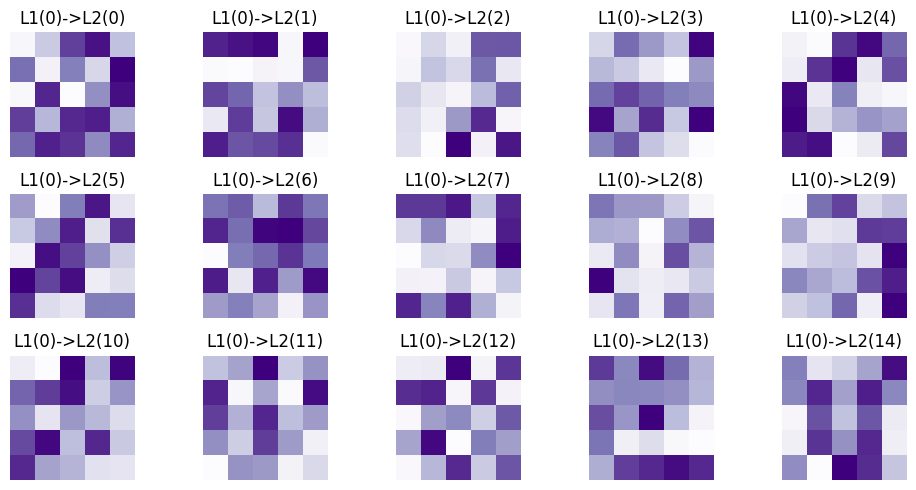

In [5]:
fig, axs = plt.subplots(3, 5, figsize=(10,5))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(c.weight[0, i, :, :]).detach(), cmap='Purples')
    ax.set_title(f"L1(0)->L2({i})")
    ax.axis('off')
    
plt.tight_layout()
plt.show()

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


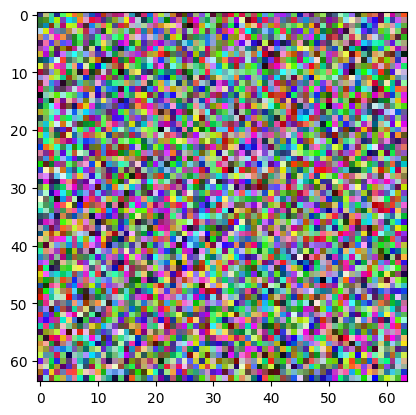

In [6]:
imsize = (1, 3, 64, 64)

img = torch.rand(imsize)

img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view))

In [7]:
conv_res = c(img)

print(img.shape)
print(conv_res.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])


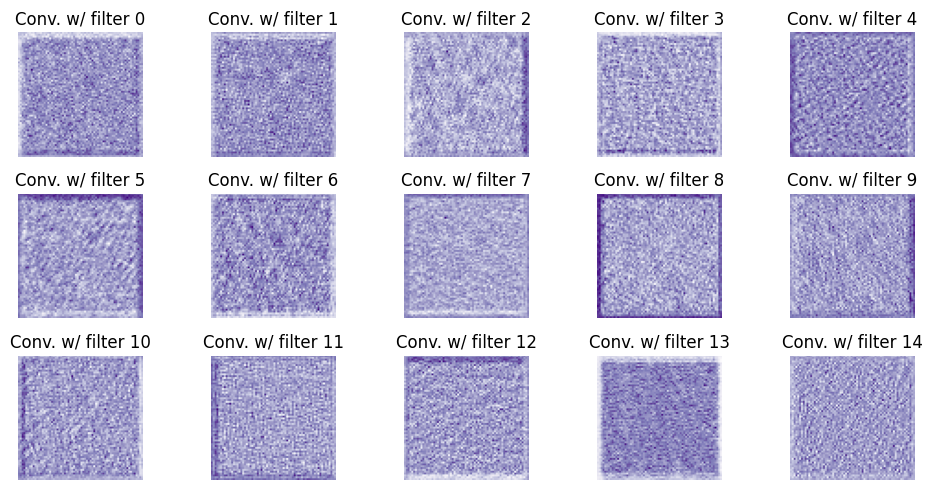

In [8]:
fig, axs = plt.subplots(3,5,figsize=(10,5))

for i, ax in enumerate(axs.flatten()):
    I = torch.squeeze(conv_res[0, i,:,:]).detach()
    
    ax.imshow(I, cmap='Purples')
    ax.set_title('Conv. w/ filter ' + str(i))
    ax.axis('off')
    
plt.tight_layout()
plt.show()